Эпоха 0, суммарная ошибка: 64496.2131
Эпоха 50, суммарная ошибка: 64438.3981
Эпоха 100, суммарная ошибка: 64438.3981
Эпоха 150, суммарная ошибка: 64438.3981
Эпоха 200, суммарная ошибка: 64438.3981
Эпоха 250, суммарная ошибка: 64438.3981
Эпоха 300, суммарная ошибка: 64438.3981
Эпоха 350, суммарная ошибка: 64438.3981
Эпоха 400, суммарная ошибка: 64438.3981
Эпоха 450, суммарная ошибка: 64438.3981
Тренировочная MSE: 0.1943, RMSE: 0.4408
Тестовая MSE: 0.1947, RMSE: 0.4412


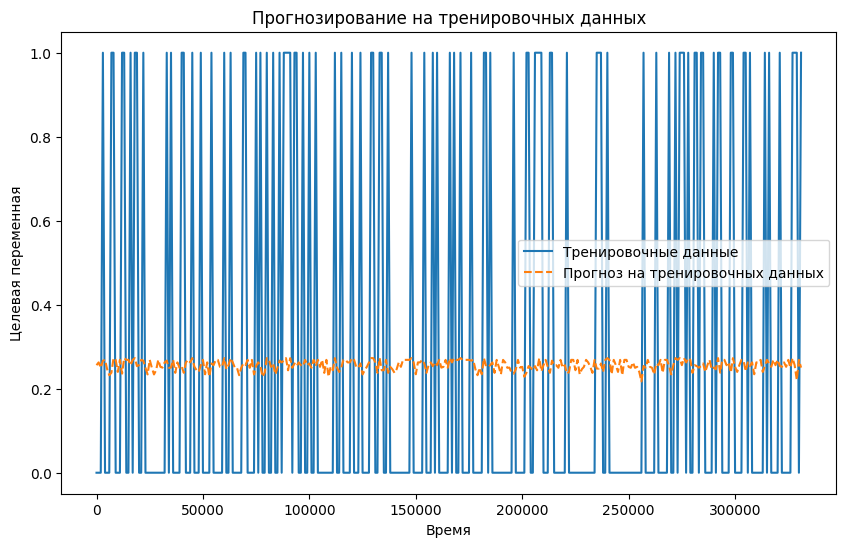

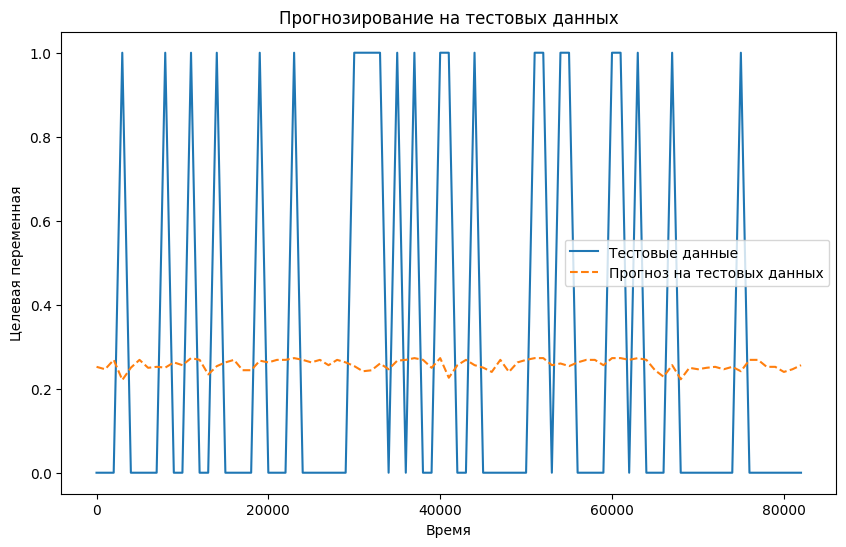

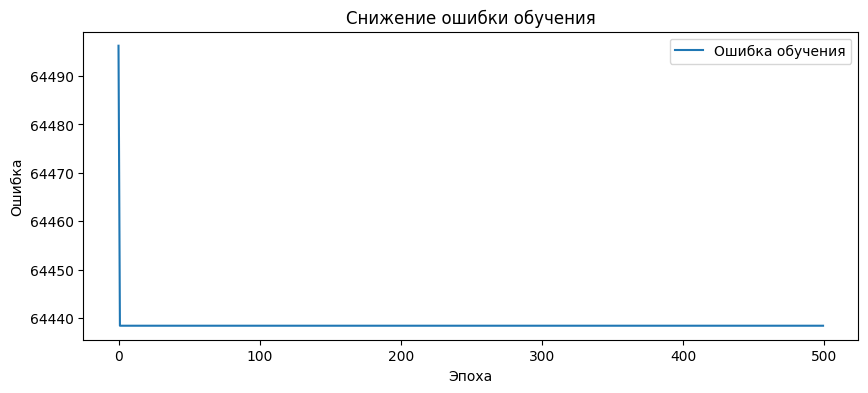

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../september/result/september.csv')

n = 5
array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rate = 0.01
n_epochs = 500
n = 5 

weights = np.random.rand(n + 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(train_data, learning_rate, n_epochs, n):
    weights = np.random.rand(n + 1) 
    errors = []

    for epoch in range(n_epochs):
        total_error = 0
        for t in range(n, len(train_data)): 
            x_input = np.array([train_data[t - i - 1] for i in range(n)] + [1]) 
            target = train_data[t] 

        
            prediction = sigmoid(np.dot(weights, x_input))  
            
        
            error = target - prediction  
            total_error += error**2 

        
            weights += learning_rate * error * x_input

        errors.append(total_error)
        if epoch % 50 == 0:
            print(f"Эпоха {epoch}, суммарная ошибка: {total_error:.4f}")

    return weights, errors

def predict(data, weights, n):
    predictions = []
    for t in range(n, len(data)):
        x_input = np.array([data[t - i - 1] for i in range(n)] + [1]) 
        prediction = sigmoid(np.dot(weights, x_input)) 
        predictions.append(prediction)
    return predictions

weights, errors = train_perceptron(y_train, learning_rate, n_epochs, n)

train_predictions = predict(y_train, weights, n)
test_predictions = predict(y_test, weights, n)

train_mse = mean_squared_error(y_train[n:], train_predictions)
test_mse = mean_squared_error(y_test[n:], test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Тренировочная MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Тестовая MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(y_train), 1000), y_train[::1000], label="Тренировочные данные")
plt.plot(range(n, len(y_train), 1000), train_predictions[::1000], label="Прогноз на тренировочных данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Целевая переменная")
plt.legend()
plt.title("Прогнозирование на тренировочных данных")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(y_test), 1000), y_test[::1000], label="Тестовые данные")
plt.plot(range(n, len(y_test), 1000), test_predictions[::1000], label="Прогноз на тестовых данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Целевая переменная")
plt.legend()
plt.title("Прогнозирование на тестовых данных")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(errors, label="Ошибка обучения")
plt.xlabel("Эпоха")
plt.ylabel("Ошибка")
plt.legend()
plt.title("Снижение ошибки обучения")
plt.show()


Тренировочная MSE: 0.2044, RMSE: 0.4521
Тестовая MSE: 0.2045, RMSE: 0.4522


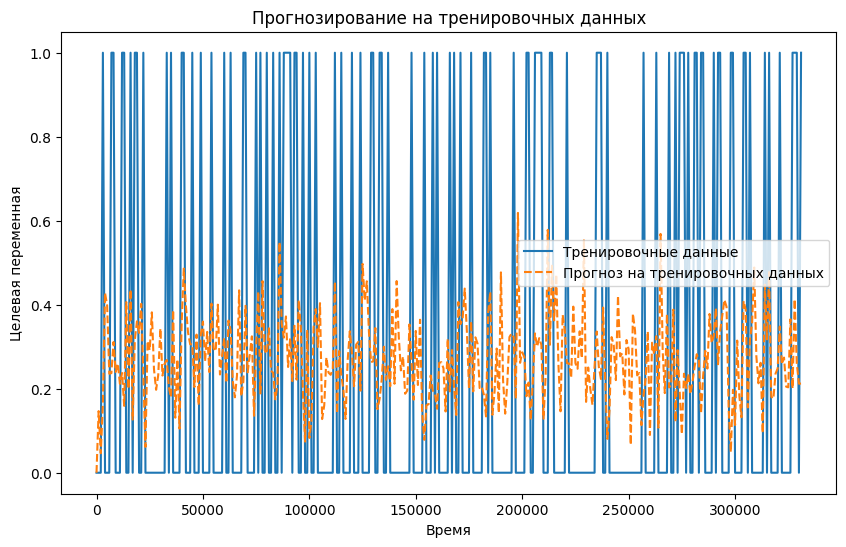

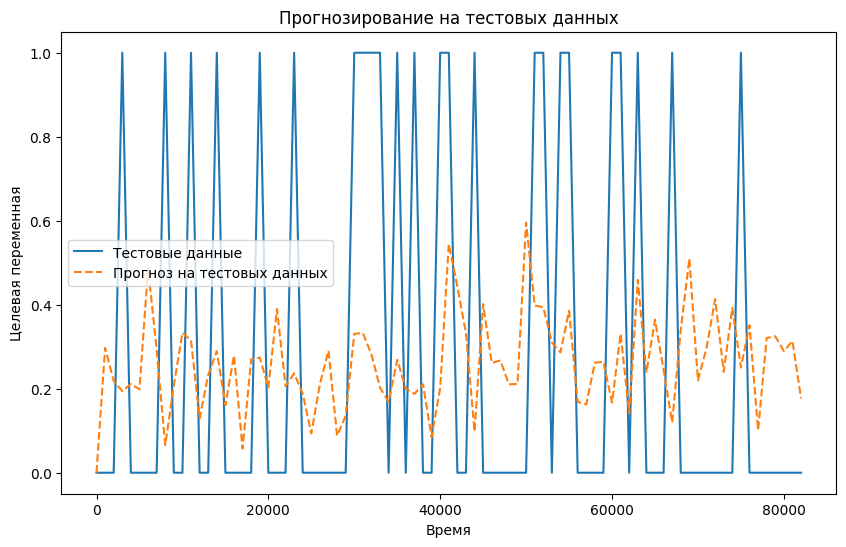

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../september/result/september.csv')

n = 5
array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha = 0.1 

def ses_predict(data, alpha):
    predictions = [data[0]] 
    for t in range(1, len(data)):
        prediction = alpha * data[t - 1] + (1 - alpha) * predictions[-1] 
        predictions.append(prediction)
    return predictions

train_predictions = ses_predict(y_train, alpha)
test_predictions = ses_predict(y_test, alpha)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Тренировочная MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Тестовая MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(y_train), 1000), y_train[::1000], label="Тренировочные данные")
plt.plot(range(0, len(train_predictions), 1000), train_predictions[::1000], label="Прогноз на тренировочных данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Целевая переменная")
plt.legend()
plt.title("Прогнозирование на тренировочных данных")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(y_test), 1000), y_test[::1000], label="Тестовые данные")
plt.plot(range(0, len(test_predictions), 1000), test_predictions[::1000], label="Прогноз на тестовых данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Целевая переменная")
plt.legend()
plt.title("Прогнозирование на тестовых данных")
plt.show()


Тренировочная MSE: 0.1941, RMSE: 0.4406
Тестовая MSE: 0.1945, RMSE: 0.4410


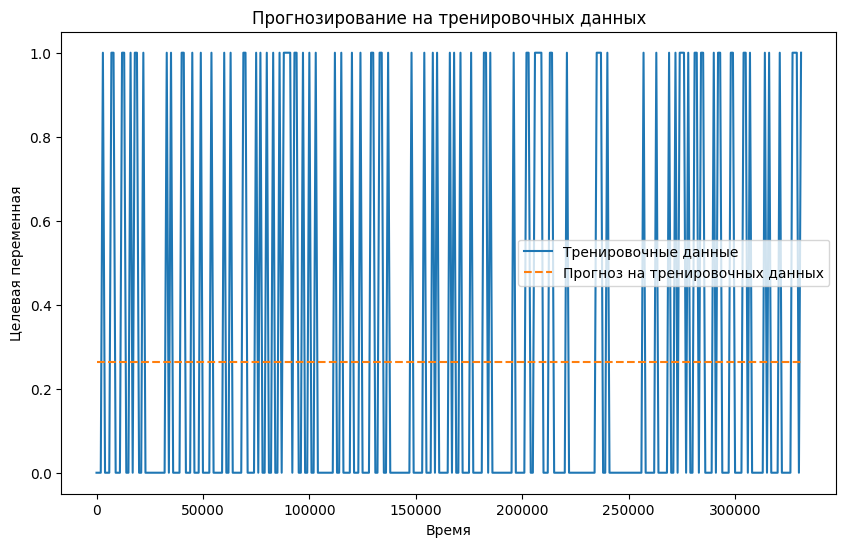

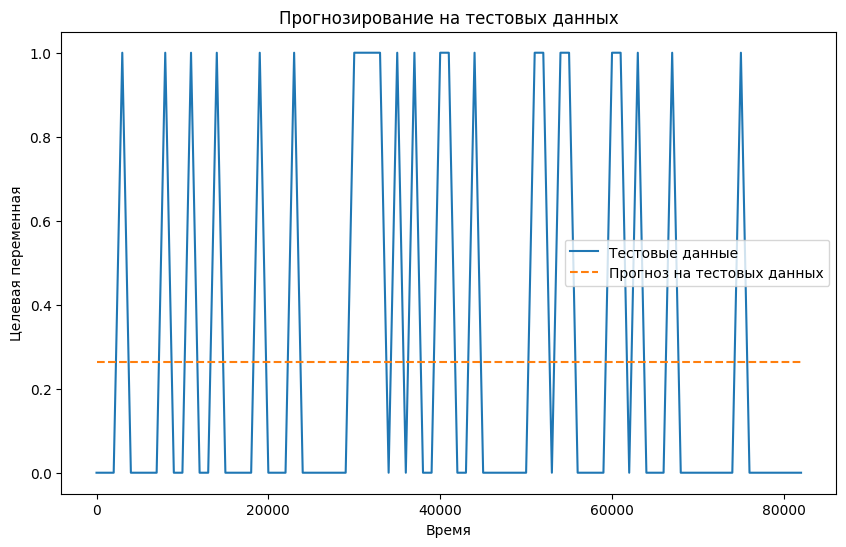

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('../september/result/september.csv')

n = 5
array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array 
y = vector_accuracy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def mean_predict(data):
    mean_value = np.mean(data) 
    predictions = [mean_value] * len(data) 
    return predictions

train_predictions = mean_predict(y_train)
test_predictions = mean_predict(y_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Тренировочная MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}")
print(f"Тестовая MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(y_train), 1000), y_train[::1000], label="Тренировочные данные")
plt.plot(range(0, len(train_predictions), 1000), train_predictions[::1000], label="Прогноз на тренировочных данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Целевая переменная")
plt.legend()
plt.title("Прогнозирование на тренировочных данных")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(y_test), 1000), y_test[::1000], label="Тестовые данные")
plt.plot(range(0, len(test_predictions), 1000), test_predictions[::1000], label="Прогноз на тестовых данных", linestyle="dashed")
plt.xlabel("Время")
plt.ylabel("Целевая переменная")
plt.legend()
plt.title("Прогнозирование на тестовых данных")
plt.show()
